In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/panel_data.csv')
data.head()

,time,state,t2m,tp,lai_hv,lai_lv,cases,deaths
0,2020-01-01,TIBESTI,13.226863,-273.149994,-273.139664,-272.885347,15.0,0.0
1,2020-01-01,BORKOU,17.938311,-273.149998,-273.136132,-272.793484,80.0,0.0
2,2020-01-01,ENNEDI OUEST,14.834963,-273.149999,-273.096772,-272.805284,58.0,0.0
3,2020-01-01,WADI FIRA,18.471732,-273.149999,-272.881383,-272.290809,600.0,0.0
4,2020-01-01,SALAMAT,25.261679,-273.149999,-272.582529,-271.838237,621.0,3.0


In [17]:
# Assuming 'data' is a pandas DataFrame and 'time' contains 'YYYY-MM' formatted strings
years = [int(element.split('-')[0]) for element in data['time']]
months = [int(element.split('-')[1]) for element in data['time']]

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the index to datetime format
data.index = pd.to_datetime({'year': years, 'month': months, 'day': 1})

def plot_data_for_a_state(state, data, ax):
    data_state = data.loc[data['state'] == state]
    ax.set_title(state)
    # Plot the first time series 't2m' on ax1
    ax.plot(data_state.index, data_state['t2m'], marker='*', color='black', label='Temperature')
    ax.plot(data_state.index, data_state['cases'], marker='*', label='Malaria cases')
    ax.plot(data_state.index, data_state['deaths'], marker='*', label='Deaths')
    ax.set_xlabel('Time')
    ax.set_ylabel('')  # Y-axis label for 't2m'
    ax.tick_params(axis='y', labelcolor='black')  # Set tick color to match the line
    ax.set_yscale('log')
    ax2 = ax.twinx()  # Create a twin axis sharing the same x-axis
    ax2.plot(data_state.index, data_state['tp'], marker='*', color='g', label='Precipitation')
    ax2.set_ylabel('', color='g')  # Y-axis label for 'tp'
    ax2.tick_params(axis='y', labelcolor='g')  # Set tick color to match the line
    ax.grid(True)
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))


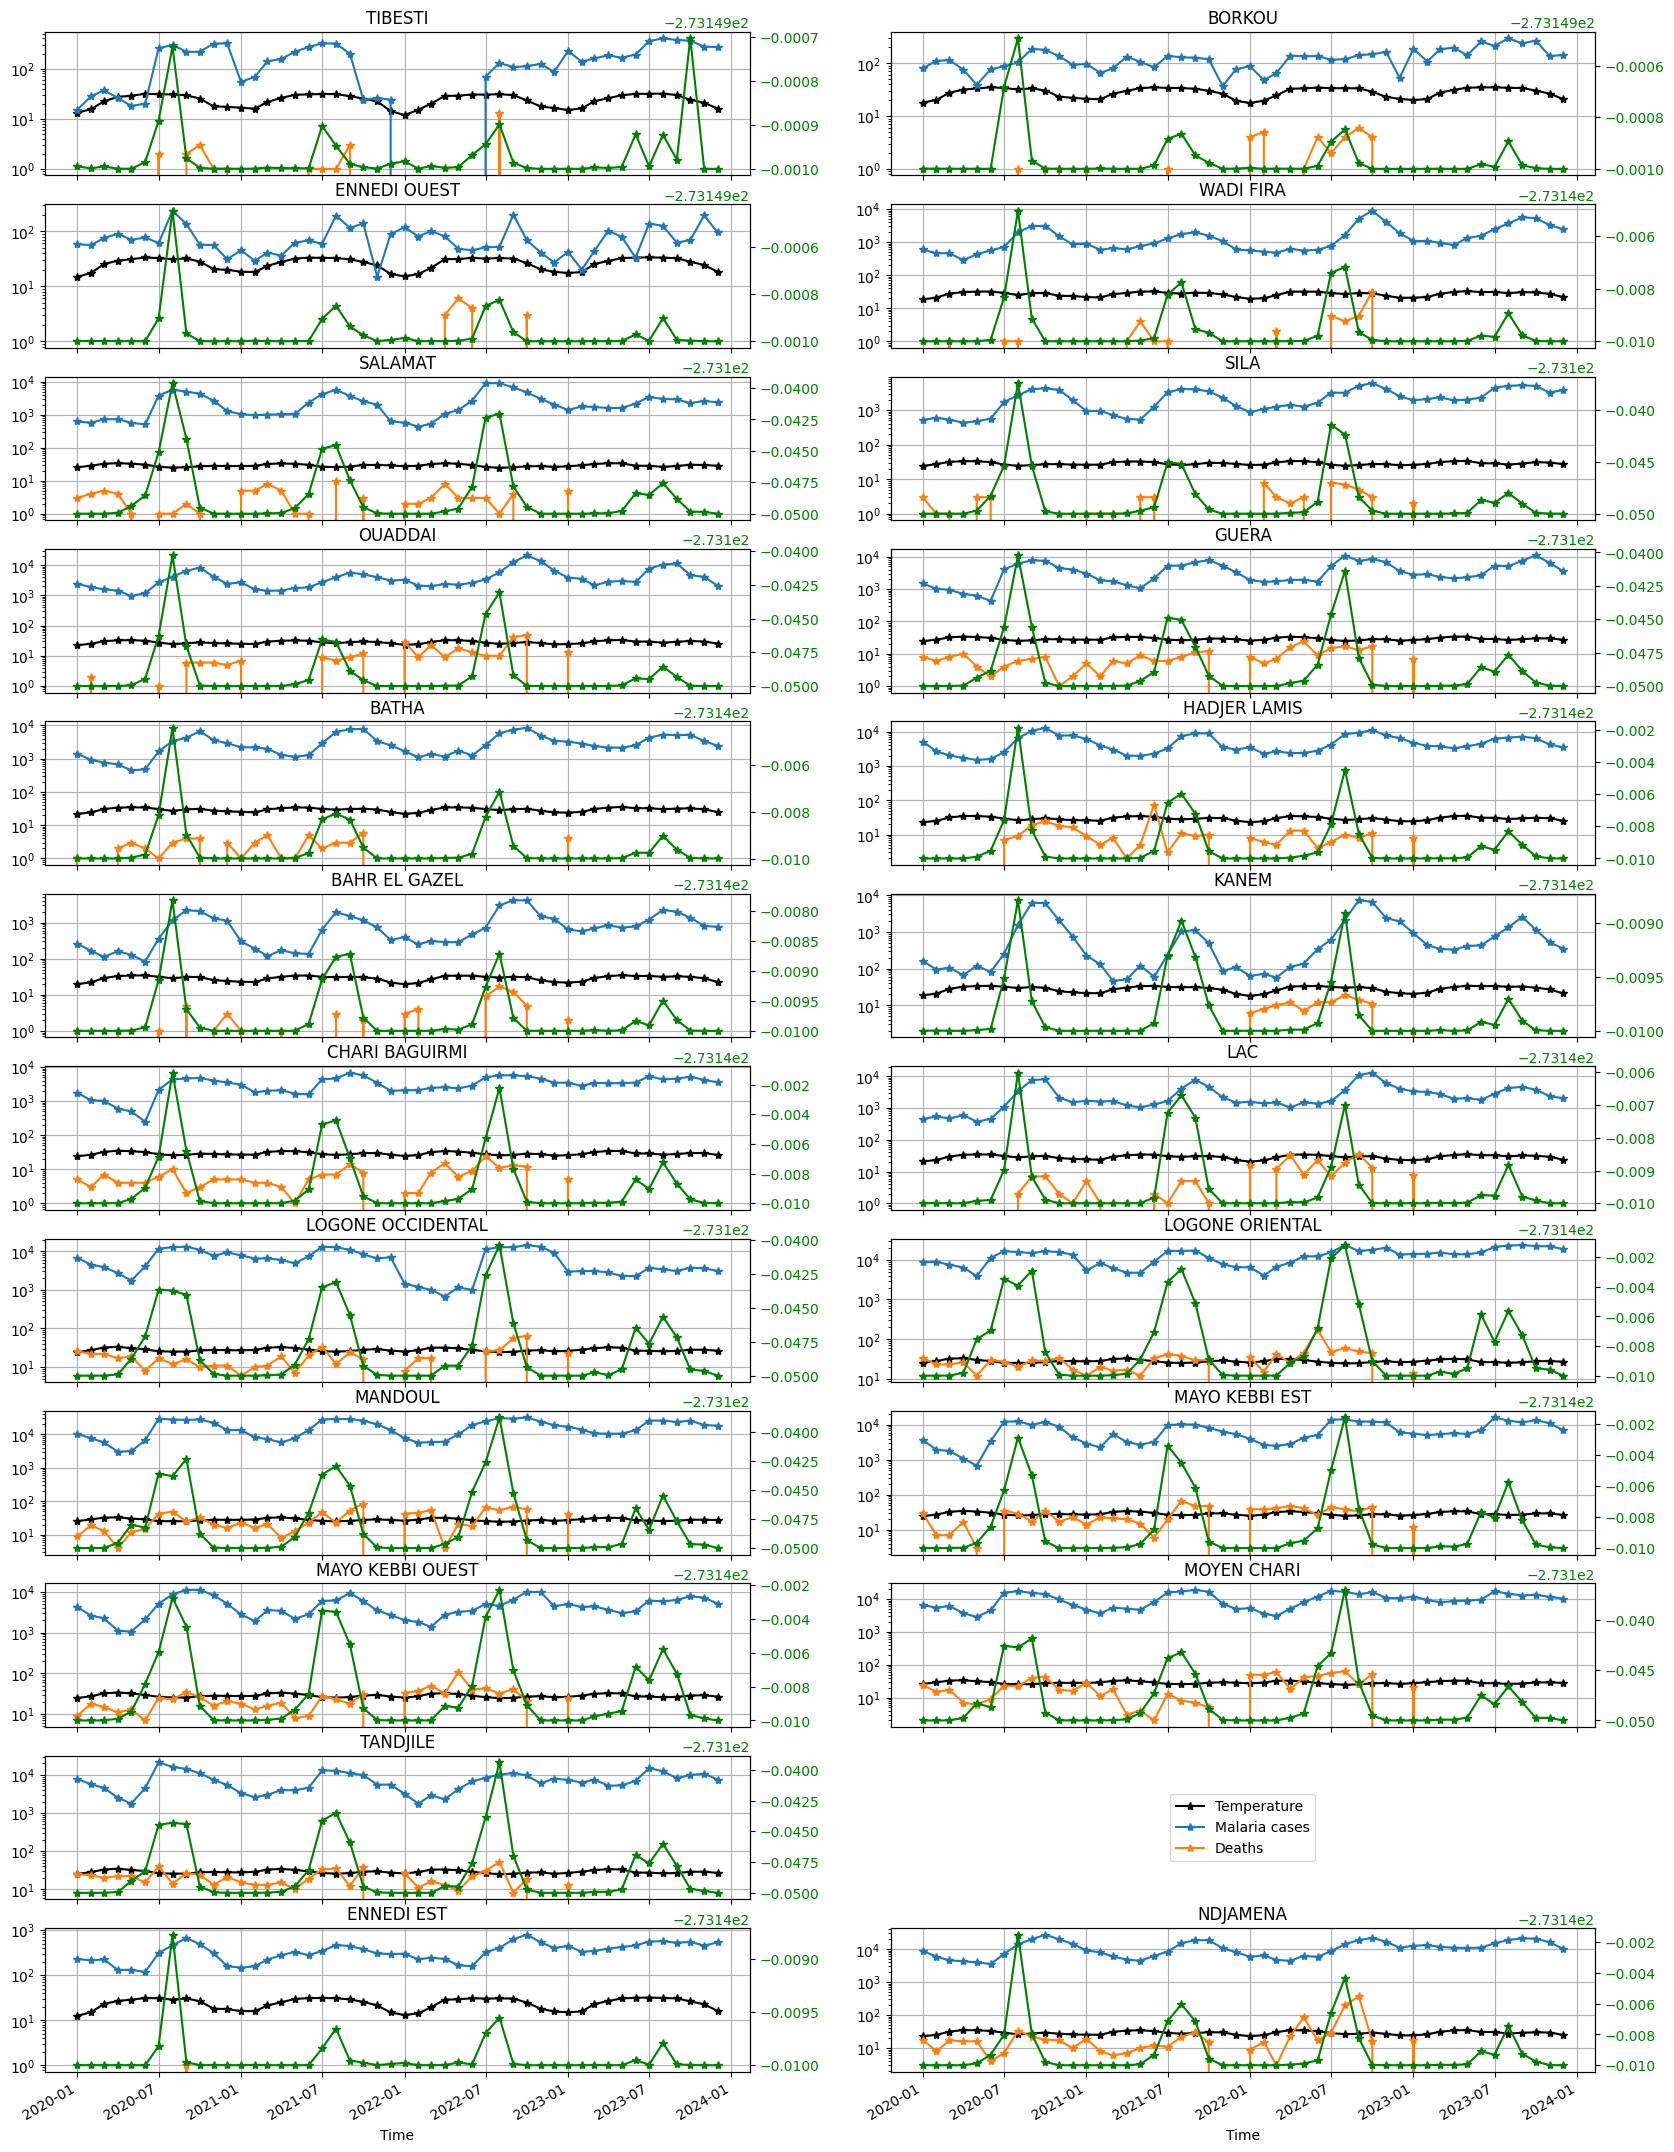

In [19]:
fig, axes = plt.subplots(12,2, figsize=(20,30))
states = data['state'].unique().tolist() + ['NDJAMENA']
states[21] = ''
for i in range(len(states)):
    if (i+1)%2 == 1:
        ax = axes[i//2,0]
        plot_data_for_a_state(states[i], data, ax)
    else:
        ax = axes[i//2,1]
        if states[i] != '':
            plot_data_for_a_state(states[i], data, ax)
    ax.set_yscale('log')
            
axes[10, 1].clear()
axes[10, 1].axis('off')
handles, labels = axes[0, 0].get_legend_handles_labels()  # Get handles and labels from the first subplot
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.5), bbox_transform=axes[10, 1].transAxes)

fig.autofmt_xdate() 
plt.savefig('../docs/time-series-plots.png', format='png', bbox_inches='tight', pad_inches=0.1)

plt.show()

In [20]:
import geopandas as gpd

data_map = gpd.read_file('../data/preprocessed_data/2020-01-01.geojson')

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


def display_in_map(data, column):
    fig, ax = plt.subplots(1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    data.plot(edgecolor='black', ax=ax, column=column, cmap='coolwarm', legend=True)
    plt.legend('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

2020-01-01


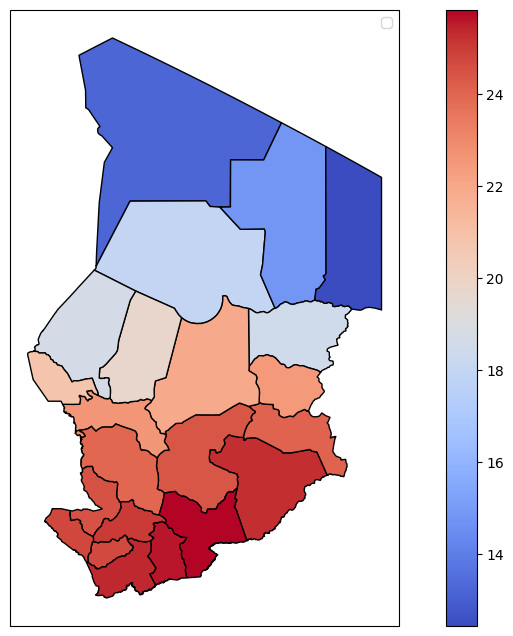

In [22]:
print('2020-01-01')
display_in_map(data_map, 't2m')
plt.show()